In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("data/water_potability.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
df = df.drop('Potability', axis = 1)

In [14]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [15]:
df = df.fillna(df.mean())

In [16]:
from sklearn.preprocessing import StandardScaler
columns = list(df.columns)
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [17]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124
3272,4.953704e-01,-0.085667,-0.534295,0.593290,3.145987e-15,-0.417706,1.698560,0.000000,-1.497627
3273,1.591254e+00,-0.626829,1.270810,0.144017,3.145987e-15,0.072263,-0.981329,0.218748,-0.856007
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,3.145987e-15,-0.288597,-0.942064,0.703468,0.950797


In [18]:
# Hardness
df = df[["ph", "Solids", "Conductivity", "Turbidity", "Hardness"]]

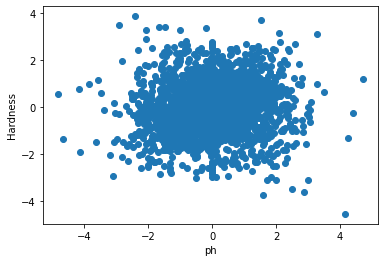

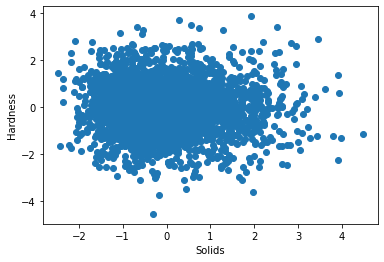

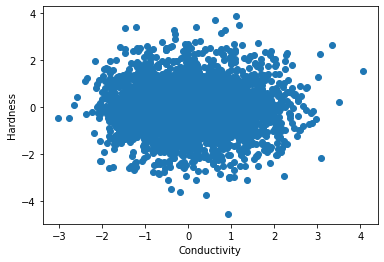

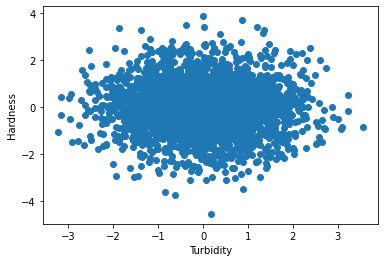

In [19]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Hardness"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Hardness")
    plt.show()

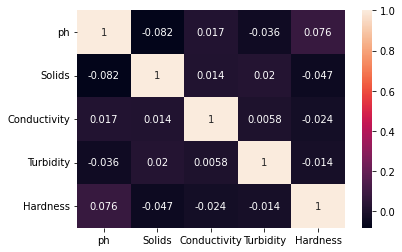

In [20]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
from pycaret.regression import *
regression = setup(df, target='Hardness')
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,786
1,Target,Hardness
2,Target type,Regression
3,Original data shape,"(3276, 5)"
4,Transformed data shape,"(3276, 5)"
5,Transformed train set shape,"(2293, 5)"
6,Transformed test set shape,"(983, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.7675,0.9998,0.9982,-0.0018,0.5607,1.1294,0.2060
lar,Least Angle Regression,0.7681,1.0009,0.9987,-0.0028,0.5536,1.1920,0.2250
lr,Linear Regression,0.7681,1.0009,0.9987,-0.0028,0.5536,1.1920,0.6050
ridge,Ridge Regression,0.7681,1.0009,0.9987,-0.0028,0.5536,1.1919,0.2090
br,Bayesian Ridge,0.7690,1.0010,0.9988,-0.0030,0.5645,1.1459,0.2140
huber,Huber Regressor,0.7662,1.0036,1.0000,-0.0053,0.5300,1.3004,0.2410
lasso,Lasso Regression,0.7738,1.0041,1.0005,-0.0067,0.6047,1.0043,0.2170
dummy,Dummy Regressor,0.7738,1.0041,1.0005,-0.0067,0.6047,1.0043,0.7840
llar,Lasso Least Angle Regression,0.7738,1.0041,1.0005,-0.0067,0.6047,1.0043,0.2250
en,Elastic Net,0.7738,1.0041,1.0005,-0.0067,0.6047,1.0043,0.2060


                                    Model     MAE     MSE    RMSE      R2  \
omp           Orthogonal Matching Pursuit  0.7675  0.9998  0.9982 -0.0018   
lar                Least Angle Regression  0.7681  1.0009  0.9987 -0.0028   
lr                      Linear Regression  0.7681  1.0009  0.9987 -0.0028   
ridge                    Ridge Regression  0.7681  1.0009  0.9987 -0.0028   
br                         Bayesian Ridge  0.7690  1.0010  0.9988 -0.0030   
huber                     Huber Regressor  0.7662  1.0036  1.0000 -0.0053   
lasso                    Lasso Regression  0.7738  1.0041  1.0005 -0.0067   
dummy                     Dummy Regressor  0.7738  1.0041  1.0005 -0.0067   
llar         Lasso Least Angle Regression  0.7738  1.0041  1.0005 -0.0067   
en                            Elastic Net  0.7738  1.0041  1.0005 -0.0067   
ada                    AdaBoost Regressor  0.7745  1.0068  1.0019 -0.0095   
gbr           Gradient Boosting Regressor  0.7710  1.0134  1.0051 -0.0163   

In [22]:
import pickle 
pickle.dump(best_model, open("Models/Hardness_Regressor.pkl", "wb"))